# 6-1: Visualizations 

Streamlit and seaborn

- histplot, lmplot, boxplot, violinplot


## Datasets we will use

- "tips" One waiter collected 244 data points about his tipping customers. https://rdrr.io/cran/reshape2/man/tips.html
- Fast Food Nutrition https://www.kaggle.com/datasets/joebeachcapital/fast-food

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
nut = pd.read_csv("./data/fast_food_nutrition_cleaned.csv")

## Histograms

A histogram is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable.

To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.


In seaborn we create a histogram using the histplot function.

- The `bins` named argument specifies the number of bins to use.
- The `kde` named argument specifies whether to plot a gaussian kernel density estimate. which is a best-fit line for the data.

<Axes: xlabel='tip', ylabel='Count'>

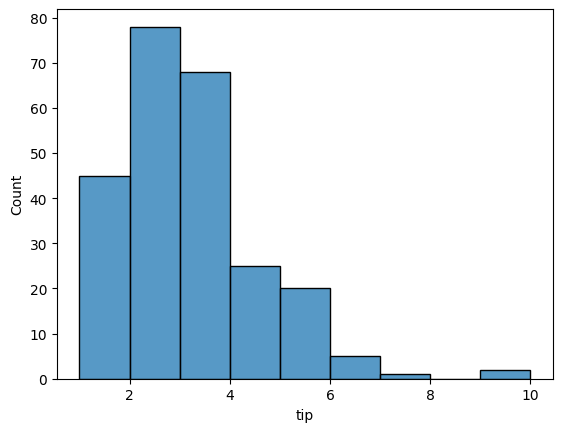

In [10]:
# distribution of tips amount 9 bins
sns.histplot(data=tips, x='tip', bins=9)

<Axes: xlabel='tip', ylabel='Count'>

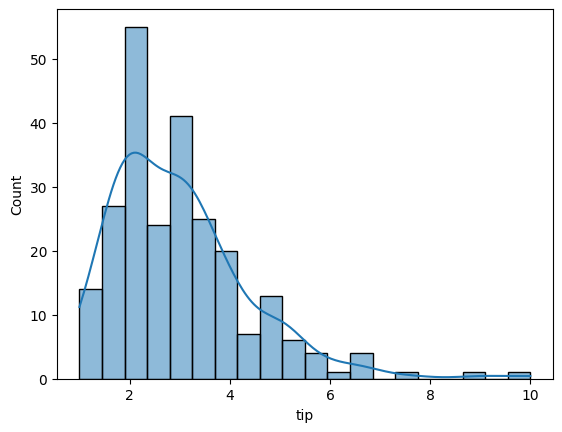

In [11]:
# distribution of tips amount 9 bins
sns.histplot(data=tips, x='tip', bins=20, kde=True)

## Challenge 6-2-1

Create a streamlit with a histogram of the calories column in the fast food dataset.

`fast_food_nutrition_cleaned.csv` 

the input is the number of bins as a slider. between 1 and 100 bins.

What happens to the data shape when you increase the number of bins?

## LM Plots

A lmplot is a scatterplot with a linear regression line.

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.



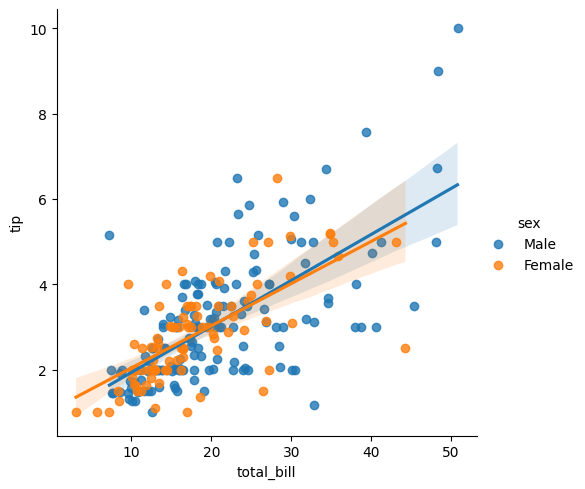

In [ ]:
# let's compare total bill to tip amount, separated by the diner's sex
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex')

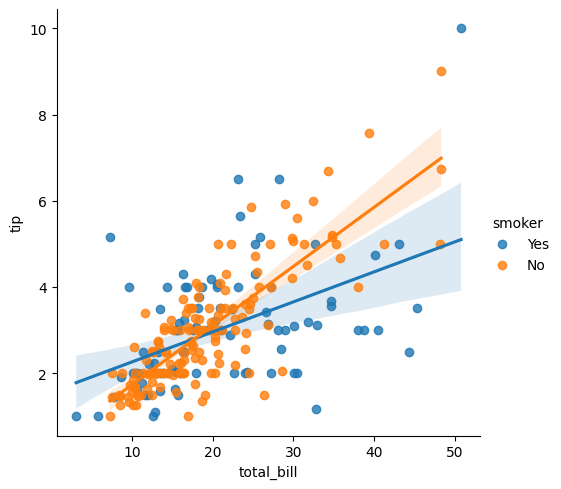

In [ ]:
# let's compare total bill to tip amount, separated by if the diner is a smoker
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')

## Challenge 6-2-2

Create a streamlit with the fast food dataset. 

`fast_food_nutrition_cleaned.csv` 

Let's plot calories vs. sodium broken down by the type fast food restaurant.

Create a streamlit to allow the user to select two restaurants to compare.

Which restaurant is the worst?

## Box Plots and Violin Plots

A **box plot** is a method for graphically depicting groups of numerical data through their **quartiles**. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data.  

- They extend no more than 1.5 * IQR (Inter-quartile-range) (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval.
- The line through the box is the median value of the data.
- The box represents the interquartile range. Q3 - Q1
- The whiskers represent the range of the data, defaults to 1.5 * (Q3 - Q1), a general rule for outliers.
- Outliers are plotted as separate points.

Think of a box plot as a must more detailed bar chart, since it tells you much more about the data than just totals.

A **violin plot** is like the combination of a box plot and a histogram. It uses a kernel density estimate to show the probability density of the data at different values.


In [ ]:
# this will help us to see what the box plot and violin plot are showing us
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: ylabel='total_bill'>

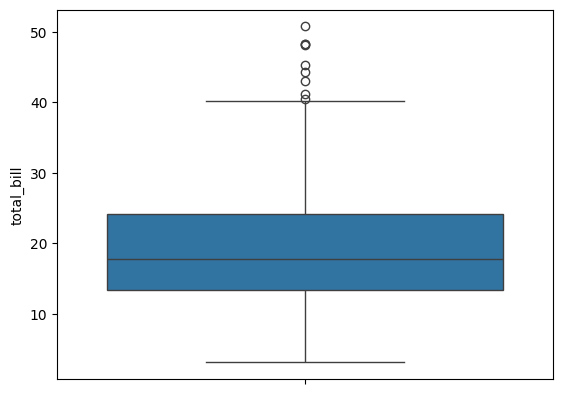

In [ ]:
# Here's a box plot of total bill by day
# median = 17.79
# 25% = 13.3475
# 75% = 24.1275
sns.boxplot(data=tips,y='total_bill')

<Axes: ylabel='total_bill'>

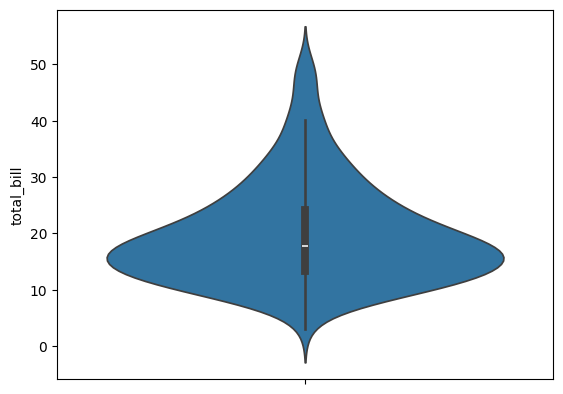

In [ ]:
# Here's a box plot of total bill by day
# median = 17.79
# 25% = 13.3475
# 75% = 24.1275
sns.violinplot(data=tips,y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

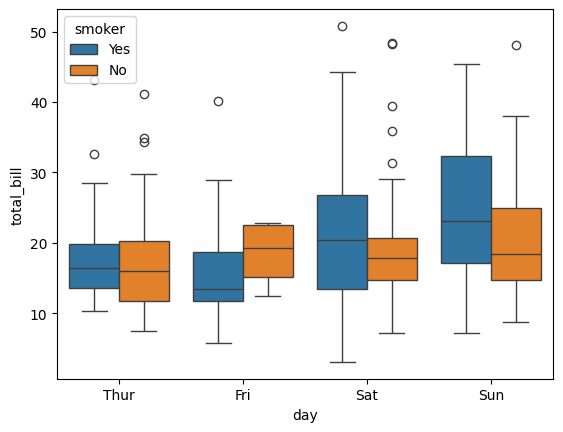

In [ ]:
# Let's boxplot of total bill by day and smoker
sns.boxplot(data=tips, x='day', y='total_bill', hue="smoker")

<Axes: xlabel='day', ylabel='total_bill'>

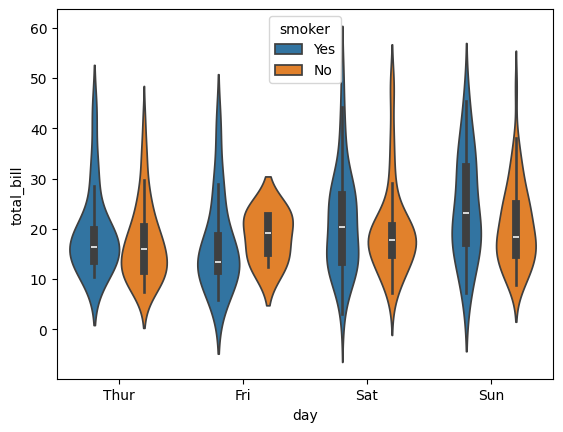

In [31]:
sns.violinplot(data=tips, x='day', y='total_bill', hue="smoker")

### Interpreting Box / Violin Plots

- short boxes and whiskers indicate that the data is dense concentrated near the median value. 
- long whiskers and boxes indicate that the data is spread out.
- long whiskers and short boxes indicate that the data is spread out but concentrated near the median value.
- short whiskers and long boxes indicate that the data is concentrated but spread out.


## Heatmaps

Heatmaps are a way to visualize data in a 2D space. They are often used to show the correlation between variables in a dataset. Its called a heatmap color gradients are used to represent the magnitude of data points

Heatmaps require 3 variables:

- x-axis variable, usually categorical
- y-axis variable
- value variable 


In seaborn, you need to filter or pivot your dataframe into a smaller dataframe that contains the x, y, and value variables only.

C:\Users\mafud\AppData\Local\Temp\ipykernel_16584\2516421358.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tp = tips.pivot_table(values='total_bill', index="day", columns='time', aggfunc='mean')


<Axes: xlabel='time', ylabel='day'>

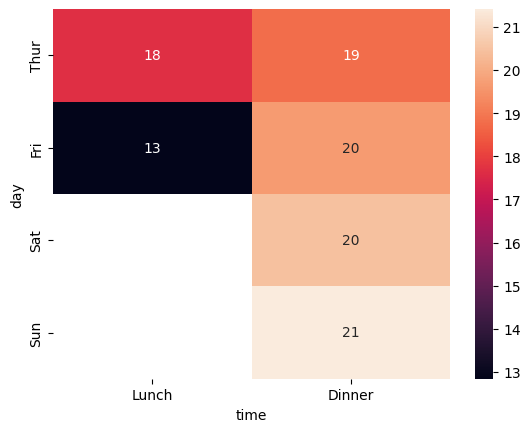

In [37]:
# pivot first 
tp = tips.pivot_table(values='total_bill', index="day", columns='time', aggfunc='mean')

# then heatmap
sns.heatmap(tp, annot=True)

## Challenge 6-2-3

Create a streamlit with the fast food dataset. 

`fast_food_nutrition_cleaned.csv` 

Let' input the macro nutrient: protein, fat, carbs, and sugar as a dropdown.

Create a heatmap of the calories vs. the macro nutrient broken down by the type fast food restaurant.

You'll have to pivot the data to create the heatmap. So use a mean aggregation to create the heatmap... average carbs, etc...

How can you interpret the heatmap you see?